Aula 1

# **Introdução à Análise Espacial com a linguagem Python**

**O que é Python?**

Python é uma linguagem de programação de alto nível, extremamente flexível e que permite o desenvolvimento de aplicações tanto utilizando o paradigma de programação estruturada quanto orientação ao objeto. É muito utilizada como ferramenta de ciência de dados.

**Por que utilizar o Python como ferramenta de análise espacial?**


---


# **As Bibliotecas Python utilizadas em análise espacial**

A  linguagem Python possui diversas bibliotecas que permitem o trabalho com dados espaciais de forma rápida e fácil.
Neste curso introdutório abordaremos principalmente a biblioteca Geopandas, que permite o trabalho com dados do tipo vetor e a manipulação de dados estruturados em tabelas, derivada da biblioteca Pandas e a biblioteca Folium, que permite a elaboração de mapas interativos.
Trabalharemos, ainda, com o pyproj, que nos permite reprojetar nossos dados espaciais em diferentes sistemas de projeção. Existe, ainda a biblioteca Geocoder, utilizada para a realização de operações de georeferenciamento.
Além dessas que serão utilizadas neste curso introdutório, há diversas outras que permitem análises mais aprofundadas, como a Rasterio, destinada ao trabalho com dados no formato raster e a PySal, que permite análises espaciais mais complexas como a estudo da autocorrelação espacial de variáveis.
Como, na análise criminal, além do fator espacial, o fator tempo é de suam relevância, no presente treinamento também abordaremos análise temporal, utilizando para tanto, a biblioteca datetime.
Assim, nosso primeiro passo para trabalharmos com a linguagem Python em análise espacial é carregarmos as bibliotecas que iremos utilizar.

In [0]:
## importando e instalando as lib utilizadas
import pandas as pd
! pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import CRS
# introducing datetime
from datetime import datetime, date, time
datetime.strptime('July 1, 2018', '%B %d, %Y')
import seaborn as sns

     |████████████████████████████████| 921kB 3.3MB/s 
     |████████████████████████████████| 10.1MB 40.7MB/s 
     |████████████████████████████████| 11.8MB 194kB/s 


In [0]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy


Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (337 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 134983 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-

In [0]:
!pip install contextily==1.0rc2

     |████████████████████████████████| 15.2MB 154kB/s 


# Utilização do Google Colab

O Google Colab é uma ferramenta que disponibiliza o compartilhamento de notebooks e é muito utilizada em ambientes acadêmicos, permitindo o acesso a máquinas capazes de realizar operações complexas, incluindo o uso de GPU.
Aceita, também comandos bash, com a utilização do "!".
Para permitirmos a utilização de arquivos existentes no repositório do Google Drive no ambiente Colab é necessário o estabelecimento de conexão, conforme exposto abaixo.

In [0]:
## Estabelecendo a conexão entre o repositório do Google Drive e o Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Carregar o arquivo excel como objeto Pandas Dataframe
Hom_2019 = pd.read_excel ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Homicidios_2019.xlsx')
Roubos_2019 = pd.read_excel ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Roubos_2019.xlsx')
# Apresentar as cinco primeiras linhas do Dataframe
Roubos_2019.head()

,id,latitude,longitude,crime_date,crime_hour,crime
0,3318609,-5.84994,-35.20930,2019-09-20,14:15:00,roubo
1,3318761,-25.43486,-54.40445,2019-09-15,07:00:00,roubo
2,3318814,-21.45348,-47.01594,2019-09-29,21:30:00,roubo
3,3319279,-5.82055,-35.22514,2019-09-29,16:50:00,roubo
4,3319489,-5.80504,-35.23762,2019-09-30,09:30:00,roubo


In [0]:
# Apresenta o tipo de objeto
type (Roubos_2019)

pandas.core.frame.DataFrame

In [0]:
## Transformar os dataframes em Geodataframe do Geo Pandas com Sistema de Coordenadas WGS84

Homicidios_2019 = gpd.GeoDataFrame(Hom_2019, geometry=gpd.points_from_xy(Hom_2019.longitude, Hom_2019.latitude))
Homicidios_2019.crs ={'init': 'epsg:4326'}

Roubos_2019 = gpd.GeoDataFrame(Roubos_2019, geometry=gpd.points_from_xy(Roubos_2019.longitude, Roubos_2019.latitude))
Roubos_2019.crs ={'init': 'epsg:4326'}

In [0]:
# Apresenta o tipo de objeto
type (Roubos_2019)

geopandas.geodataframe.GeoDataFrame

In [0]:
# Apresentar as cinco primeiras linhas do GeoDataframe
Homicidios_2019.head()

,id,latitude,longitude,crime_date,crime_hour,crime,geometry
0,3329252,-5.795880,-35.239990,2019-10-02,15:00:00,Homicidio,POINT (-35.23999 -5.79588)
1,3468256,-5.881550,-35.200810,2019-10-05,08:00:00,Homicidio,POINT (-35.20081 -5.88155)
2,3470267,-5.731931,-35.284411,2019-10-07,01:30:00,Homicidio,POINT (-35.28441 -5.73193)
3,3470990,-5.822150,-35.223190,2019-10-04,05:30:00,Homicidio,POINT (-35.22319 -5.82215)
4,3475402,-5.791290,-35.201210,2019-10-01,20:15:00,Homicidio,POINT (-35.20121 -5.79129)


In [0]:
# Lista o índice das colunas da tabela
Roubos_2019.columns

Index(['id', 'latitude', 'longitude', 'crime_date', 'crime_hour', 'crime',
       'geometry'],
      dtype='object')

In [0]:
# Lista os tipos de dados existentes no dataframe
Roubos_2019.dtypes

id                     int64
latitude             float64
longitude            float64
crime_date    datetime64[ns]
crime_hour            object
crime                 object
geometry            geometry
dtype: object

In [0]:
# Seleciona os valores de uma determinada coluna
Roubos_2019['crime']

0       roubo
1       roubo
2       roubo
3       roubo
4       roubo
        ...  
8596    roubo
8597    roubo
8598    roubo
8599    roubo
8600    roubo
Name: crime, Length: 8601, dtype: object

In [0]:
# Apresenta o resultado dos principais indicadores de estatística descritiva em relação ao valores númericos
Roubos_2019.describe()

,id,latitude,longitude
count,8.601000e+03,8601.000000,8601.000000
mean,1.490722e+06,-8.596036,-37.583288
std,8.561785e+05,6.740781,5.334744
min,9.428330e+05,-33.132650,-62.141480
25%,1.062108e+06,-5.866380,-35.275120
50%,1.120184e+06,-5.814440,-35.244880
75%,1.136158e+06,-5.760060,-35.213800
max,3.529991e+06,0.700510,-34.828370


In [0]:
# Apresenta o número de linhas e colunas de um dataframe
linhas, colunas = Roubos_2019.shape
print ('Roubos_2019 tem', linhas, 'linhas e', colunas, 'colunas.')

Roubos_2019 tem 8601 linhas e 7 colunas.


In [0]:
# Apresenta o total de valores únicos existentes em cada coluna do dataframe
Roubos_2019.nunique()

id            8601
latitude      2989
longitude     2871
crime_date     295
crime_hour     831
crime            1
geometry      3166
dtype: int64

## Análise de Série Temporal

Tendo em vista que o fenômeno crime tem como fundamental não só a dimensão espacial mas também a dimensão temporal, é relevante que se aborde neste workshop introdutório as ferramentas de análise de série temporal existentes no Pandas e por conseguinte no Geopandas.
Para tanto utilizaremos a biblioteca Datetime, que permite a manipulação de dados temporais armazenados em objetos do tipo dataframe.

In [0]:
# Ordena os valores a partir do valor de uma determinada coluna
Roubos_2019.sort_values(by = 'crime_date')

,id,latitude,longitude,crime_date,crime_hour,crime,geometry
1075,1045107,-23.70879,-46.55516,2019-01-01,08:15:00,roubo,POINT (-46.55516 -23.70879)
768,1042330,-3.74505,-43.36266,2019-01-01,09:00:00,roubo,POINT (-43.36266 -3.74505)
765,1042255,-29.19111,-51.20026,2019-01-01,10:00:00,roubo,POINT (-51.20026 -29.19111)
764,1042254,-5.84073,-35.27818,2019-01-01,00:00:00,roubo,POINT (-35.27818 -5.84073)
776,1042485,-20.35523,-40.28894,2019-01-01,01:30:00,roubo,POINT (-40.28894 -20.35523)
...,...,...,...,...,...,...,...
627,3527336,-5.82818,-35.23647,2019-10-21,13:28:00,roubo,POINT (-35.23647 -5.82818)
661,3529105,-5.82904,-35.24969,2019-10-22,07:00:00,roubo,POINT (-35.24969 -5.82904)
663,3529268,-5.80944,-35.24038,2019-10-22,09:20:00,roubo,POINT (-35.24038 -5.80944)
657,3528900,-5.76929,-35.26042,2019-10-22,08:55:00,roubo,POINT (-35.26042 -5.76929)


In [0]:
## Aplica filtros no Dataset 
Roubos_2019[Roubos_2019['crime_date']=='2019-01-01']

,id,latitude,longitude,crime_date,crime_hour,crime,geometry
762,1042231,-5.72522,-35.26144,2019-01-01,00:00:00,roubo,POINT (-35.26144 -5.72522)
764,1042254,-5.84073,-35.27818,2019-01-01,00:00:00,roubo,POINT (-35.27818 -5.84073)
765,1042255,-29.19111,-51.20026,2019-01-01,10:00:00,roubo,POINT (-51.20026 -29.19111)
768,1042330,-3.74505,-43.36266,2019-01-01,09:00:00,roubo,POINT (-43.36266 -3.74505)
776,1042485,-20.35523,-40.28894,2019-01-01,01:30:00,roubo,POINT (-40.28894 -20.35523)
1075,1045107,-23.70879,-46.55516,2019-01-01,08:15:00,roubo,POINT (-46.55516 -23.70879)
7786,1140723,-21.78335,-48.56923,2019-01-01,16:00:00,roubo,POINT (-48.56923 -21.78335)


In [0]:
# Apresenta o tipo do dado de uma determinada coluna
type (Roubos_2019['crime_date'])

pandas.core.series.Series

In [0]:
Roubos_2019_copy = Roubos_2019.copy ()
# converte o objeto datetime para colunas individuais
dia = []
mes = []
ano = []
for i in Roubos_2019_copy['crime_date']:
    dia.append(i.day)
    mes.append(i.month)
    ano.append(i.year)
Roubos_2019_copy['dia'] = dia
Roubos_2019_copy['mes'] = mes
Roubos_2019_copy['ano'] = ano
Roubos_2019_copy.head(2)

,id,latitude,longitude,crime_date,crime_hour,crime,geometry,dia,mes,ano
0,3318609,-5.84994,-35.20930,2019-09-20,14:15:00,roubo,POINT (-35.20930 -5.84994),20,9,2019
1,3318761,-25.43486,-54.40445,2019-09-15,07:00:00,roubo,POINT (-54.40445 -25.43486),15,9,2019


Evolução Mensal dos Roubos em 2019


Text(0.5, 1.0, 'Análise de Roubos por Mês')

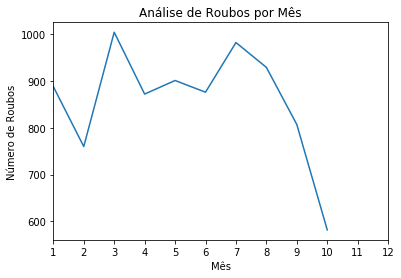

In [0]:
# Cria uma variável composta pelo total de roubos que ocorreram em cada mês
Roubos_por_Mes = Roubos_2019_copy.groupby('mes').size()
print('Evolução Mensal dos Roubos em 2019')
# Gera o gráfico correspondente
plot_by_month = Roubos_por_Mes.plot(title='Roubos por Mês',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Mês')
plot_by_month.set_ylabel('Número de Roubos')
plt.title("Análise de Roubos por Mês")

Evolução Mensal dos Roubos em 2019


Text(0.5, 1.0, 'Análise de Roubos por Mês')

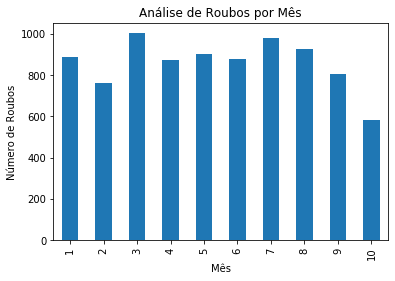

In [0]:
Roubos_por_Mes = Roubos_2019_copy.groupby('mes').size()
print('Evolução Mensal dos Roubos em 2019')
# Gera o gráfico de barras correspondente
plot_by_month = Roubos_por_Mes.plot.bar(title='Roubos por Mês')
plot_by_month.set_xlabel('Mês')
plot_by_month.set_ylabel('Número de Roubos')
plt.title("Análise de Roubos por Mês")

Evolução Mensal dos Roubos em 2019


Text(0.5, 1.0, 'Análise de Roubos por Mês')

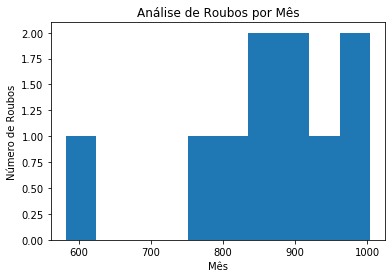

In [0]:
Roubos_por_Mes = Roubos_2019_copy.groupby('mes').size()
print('Evolução Mensal dos Roubos em 2019')
# Gera o histograma correspondente
plot_by_month = Roubos_por_Mes.plot.hist(title='Roubos por Mês')
plot_by_month.set_xlabel('Mês')
plot_by_month.set_ylabel('Número de Roubos')
plt.title("Análise de Roubos por Mês")

In [0]:
# Seleciona os roubos ocorridos em fevereiro
Roubos_Fev = Roubos_2019_copy.loc[Roubos_2019_copy['mes']==2]
Roubos_Fev.head(2)

,id,latitude,longitude,crime_date,crime_hour,crime,geometry,dia,mes,ano
26,3321964,-5.74754,-35.27104,2019-02-09,19:30:00,roubo,POINT (-35.27104 -5.74754),9,2,2019
211,3472527,-5.81132,-35.20932,2019-02-17,18:00:00,roubo,POINT (-35.20932 -5.81132),17,2,2019


Evolução Diária dos Roubos em Fevereiro de 2019


Text(0, 0.5, 'Número de Roubos')

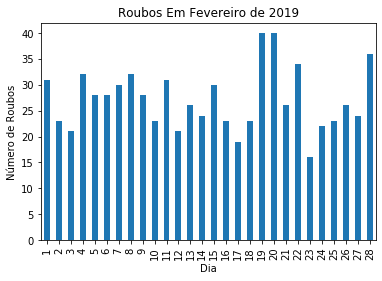

In [0]:
# Cria uma variável composta pelo total de roubos que ocorreram em cada dia de fevereiro
Roubos_por_dia = Roubos_Fev.groupby('dia').size()
print('Evolução Diária dos Roubos em Fevereiro de 2019')
# Gera o gráfico de barras correspondente
plot_by_month = Roubos_por_dia.plot.bar(title='Roubos Em Fevereiro de 2019')
plot_by_month.set_xlabel('Dia')
plot_by_month.set_ylabel('Número de Roubos')


# Projeções Cartográficas e Sistemas de Coordenadas

As projeções cartográficas representam os modos pelos quais os cartográfos enfrentam o desafio de representar em uma superfície plana, um mapa, um objeto esférico, a terra.
Existem diferentes formas de projeçõe, cada qual adequada a uma determinada situação ou região.
Assim, temos as projeções azimutais ou planas, cônicas ou cilindrícas, de acordo com a superfície de projeção ou ainda confromes (mantém os ângulos conservados), equivalentes (áreas conservadas), equidistantes (distâncias conservadas) ou afilática (não mantém nenhuma propriedade mas minimiza as deformações em conjunto).
Relacionada ao tipo de projeção temos ainda o Datum, que corresponde ao ponto de referência a partir do qual o mapa foi desenhado. No presente workshop utilizaremos como Data o WGS -84, muito comum por sua utilização mundial e nos aparelhos de GPS; e o SIRGAS 2000, que desde 2005 é o Datum oficial brasileiro.
Ainda associado à Cartografia é importante apresentar os sistemas de coordenadas que iremos utilizar, o sistema de coordenadas geográficas, no qual as latitudes e longitudes são expressas em graus, a partir do Equador e do Meridiano de Greenwich, respectivamente, e UTM, que expressa as coordenadas em metros.

In [0]:
from IPython.display import Image
Image (url = 'https://static.mundoeducacao.bol.uol.com.br/mundoeducacao/conteudo/projecao-cilindrica(1).jpg')



In [0]:
Image (url = 'https://static.mundoeducacao.bol.uol.com.br/mundoeducacao/conteudo/projecao-plana(1).jpg')

In [0]:
Image (url = 'https://static.mundoeducacao.bol.uol.com.br/mundoeducacao/conteudo/projecao-conica(1).jpg')

In [0]:
Image (url = 'https://miro.medium.com/max/2016/1*tVPOuuNA5XDMlKPdmpP3QQ.png') ## WGS-84

In [0]:
Image (url = 'https://miro.medium.com/max/2016/1*2mYaV6ySDDOTZhAz_MEWQg.png') ## Projeção de Mercator

# Construção de Mapas Temáticos e Cloropletos utilizando a Linguagem Python

Com a utilização das bibliotecas Geopandas e Matplotlib se torna intuitivo a criação de mapas temáticos, isto é, destinadas a representar espacialmente um assunto de interesse. Dentre os tipos de mapa temáticos, destacam-se os mapas cloropletos ou coropletos, que representam um determinado valor numérico a uma determinada área representada por um polígono, através de uma escala de cores, como verificar-se-á a seguir.

É importante, ainda, apresentar as formas básicas de dados espaciais vetoriais: pontos, linhas e polígonos, que conjuntamente com suas variações multi, representam de forma discreta os dados no espaço.

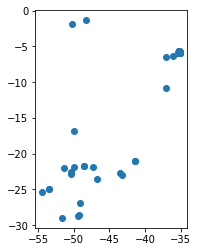

In [0]:
# Plota no eixo de coordenadas do Geodataframe os pontos correspondentes ao dataset de homicídios
Homicidios_2019.plot()

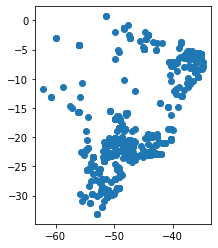

In [0]:
# Plota no eixo de coordenadas do Geodataframe os pontos correspondentes ao dataset de roubos
Roubos_2019.plot()

In [0]:
# Carrega e transforma o arquivo shapefile dos municípios brasileiros como um objeto do tipo Geodataframe com DATUM WGS 84 e Coordenadas Geográficas
Municipios_BR = gpd.read_file('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Mun_BR.shp')
Municipios_BR.crs ={'init': 'epsg:4326'}
Municipios_BR.head ()

,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUÁ,3509106,"POLYGON ((-51.86001 -21.58072, -51.85892 -21.5..."
1,CASTILHO,3511003,"POLYGON ((-51.41936 -20.68108, -51.41942 -20.6..."
2,DRACENA,3514403,"POLYGON ((-51.48515 -21.42765, -51.48500 -21.4..."
3,ESTRELA DO NORTE,3515301,"POLYGON ((-51.57097 -22.39887, -51.57099 -22.3..."
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((-52.44569 -22.60828, -52.44569 -22.6..."


In [0]:
# Apresenta o tipo de geometria do dataframe dos municípios
Municipios_BR['geometry'].head()

0    POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...
1    POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...
2    POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...
3    POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...
4    POLYGON ((-52.44569 -22.60828, -52.44569 -22.6...
Name: geometry, dtype: geometry

In [0]:
# Apresenta o tipo de geometria do dataframe dos Roubos
Roubos_2019['geometry'].head()

0     POINT (-35.20930 -5.84994)
1    POINT (-54.40445 -25.43486)
2    POINT (-47.01594 -21.45348)
3     POINT (-35.22514 -5.82055)
4     POINT (-35.23762 -5.80504)
Name: geometry, dtype: geometry

In [0]:
# Seleciona o Município de Natal e calcula a sua área (em graus)
Municipios_BR[Municipios_BR['NM_MUNICIP']=='NATAL'].area

3899    0.013657
dtype: float64

In [0]:
# Calcula a área em graus dos municípios brasileiros
Municipios_BR.area.head()

0    0.048137
1    0.092484
2    0.042523
3    0.023253
4    0.050373
dtype: float64

In [0]:
# Cria um novo dataframe e inclui nesse dataframe uma coluna contendo a área em graus de todos os municípios brasieliros 
Municipios_BR_copy = Municipios_BR.copy()
Municipios_BR_copy['area'] = Municipios_BR_copy.area
Municipios_BR_copy.tail()

,NM_MUNICIP,CD_GEOCMU,geometry,area
5567,TEIXEIRÓPOLIS,1101559,"POLYGON ((-62.12258 -10.89939, -62.12418 -10.9...",0.038043
5568,THEOBROMA,1101609,"POLYGON ((-61.95442 -9.94968, -61.95552 -9.950...",0.181267
5569,URUPÁ,1101708,"POLYGON ((-62.15601 -11.02598, -62.15500 -11.0...",0.068835
5570,VALE DO ANARI,1101757,"POLYGON ((-61.57464 -9.71779, -61.58190 -9.711...",0.258321
5571,VALE DO PARAÍSO,1101807,"POLYGON ((-61.97267 -10.06753, -61.97104 -10.0...",0.079722


In [0]:
# Seleciona o Município de Natal e cria um novo Geodataframe com sua geometria
Natal = Municipios_BR_copy.loc [Municipios_BR['NM_MUNICIP']=='NATAL'].copy()
Natal.head ()


,NM_MUNICIP,CD_GEOCMU,geometry,area
3899,NATAL,2408102,"POLYGON ((-35.20425 -5.74301, -35.20325 -5.748...",0.013657


In [0]:
# Identifica o sistema de coordenadas utlizado pelo Geodataframe Natal
Natal.crs

{'init': 'epsg:4326'}

In [0]:
# Descreve o CRS que corresponde ao código EPSG 4326
Natal_CRS = CRS.from_epsg (4326)
Natal_CRS

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

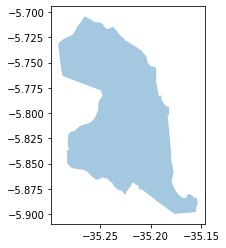

In [0]:
# Plota o geodataframe Natal com transparência igual a 0,4
Natal.plot(alpha = 0.4)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


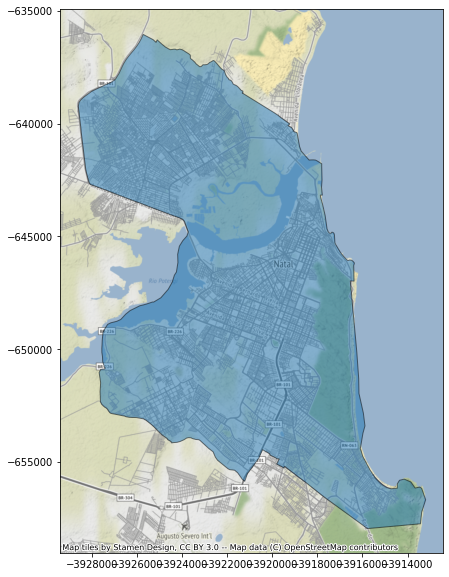

In [0]:
# Cria um mapa de Natal com mapa base ao fundo
import contextily as ctx
Natal_WebMercartor = Natal.to_crs (epsg = 3857)
ax = Natal_WebMercartor.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [0]:
## Cria um novo Geodataframe ao converter o Geodataframe Natal para o CRS DATUM SIRGAS 2000 e CRS UTM 25 S
Natal_UTM = Natal.copy()
Natal_UTM = Natal_UTM.drop('area', axis = 1) # descarta a coluna área do Geodataframe
Natal_UTM = Natal_UTM.to_crs (epsg = 31985)
Natal_UTM.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,NM_MUNICIP,CD_GEOCMU,geometry
3899,NATAL,2408102,"POLYGON ((255886.119 9364733.803, 255999.171 9..."


In [0]:
type (Natal_UTM)

geopandas.geodataframe.GeoDataFrame

In [0]:
Natal_UTM['area']=Natal_UTM.area
Natal_UTM.head()

,NM_MUNICIP,CD_GEOCMU,geometry,area
3899,NATAL,2408102,"POLYGON ((255886.119 9364733.803, 255999.171 9...",1.673829e+08


In [0]:
Natal_UTM_CRS = CRS.from_epsg (31985)
Natal_UTM_CRS

<Projected CRS: EPSG:31985>
Name: SIRGAS 2000 / UTM zone 25S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 36°W to 30°W
- bounds: (-36.0, -23.8, -29.99, 4.19)
Coordinate Operation:
- name: UTM zone 25S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [0]:
# Apresenta uma maneira mais 'pythonic' para apresentar o path de um arquivo
import os
folder = r'/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python'
file_name = 'Natal.shp'
file_path = os.path.join (folder, file_name)
file_path

'/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Natal.shp'

In [0]:
# Salva o Geodataframe como arquivo do tipo shapefile
Natal.to_file (file_path)

In [0]:
# Constrói mapa temático dos municípios brasileiros e das ocorrências de roubo
f, ax = plt.subplots(1,figsize =(10,10))
ax = Municipios_BR.plot(color='none', linestyle = '-', edgecolor='gray', linewidth = 0.1, legend = True, ax=ax)
Roubos_2019.plot(color='green', markersize=4, ax=ax)
plt.show()


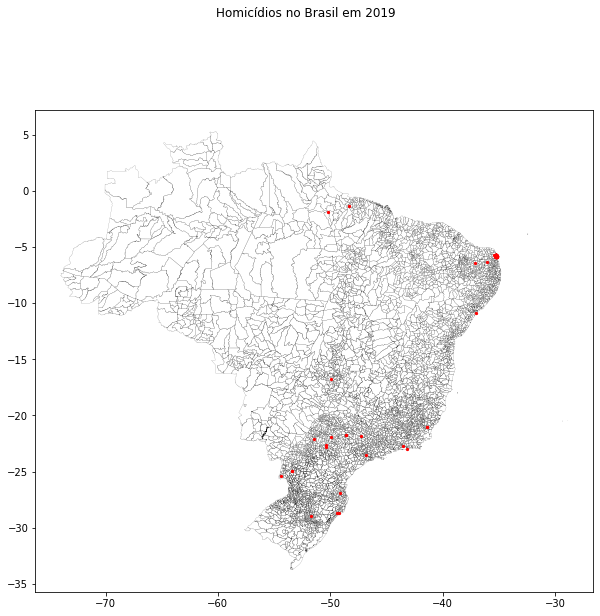

In [0]:
# Constrói mapa temático dos municípios brasileiros e das ocorrências de homicídios
f, ax = plt.subplots(1,figsize =(10,10))
ax = Municipios_BR.plot(color='none', linestyle = '-', edgecolor='black', linewidth = 0.1, legend = True, ax=ax)
f.suptitle('Homicídios no Brasil em 2019')
Homicidios_2019.plot(color='red', markersize=5, ax=ax)
plt.show()


In [0]:
# Carrega o arquivo shp dos Estados brasileiros como Geodataframe
Brasil_Estados = gpd.read_file ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Brasil.shp')
Brasil_Estados.crs = {'init':'epsg:4326'}
Brasil_Estados


,ESTADOS,REGIAO,COD_UF,UF,geometry
0,Acre,Norte,12.0,AC,"POLYGON ((-73.80098 -7.11145, -73.74084 -7.143..."
1,Alagoas,Nordeste,27.0,AL,"MULTIPOLYGON (((-36.39119 -10.50082, -36.39864..."
2,Amapá,Norte,16.0,AP,"MULTIPOLYGON (((-51.37380 -0.37053, -51.37337 ..."
3,Amazonas,Norte,13.0,AM,"POLYGON ((-73.80098 -7.11145, -73.80106 -7.111..."
4,Bahia,Nordeste,29.0,BH,"MULTIPOLYGON (((-46.32975 -13.25248, -46.33072..."
5,Ceará,Nordeste,23.0,CE,"MULTIPOLYGON (((-41.40014 -3.32039, -41.39750 ..."
6,Distrito Federal,Centro Oeste,53.0,DF,"POLYGON ((-48.28667 -15.84282, -48.28464 -15.8..."
7,Espírito Santo,Sudeste,32.0,ES,"MULTIPOLYGON (((-40.22200 -17.98004, -39.83347..."
8,Goiás,Centro Oeste,52.0,GO,"POLYGON ((-53.25072 -17.61877, -53.24644 -17.6..."
9,Maranhão,Nordeste,21.0,MN,"MULTIPOLYGON (((-43.71565 -2.49527, -43.71523 ..."


In [0]:
# Substitui as siglas dos estados da Bahia e Maranhão que estavam incorretas no shapefile original
Brasil_Estados = Brasil_Estados.replace ('BH', 'BA')
Brasil_Estados = Brasil_Estados.replace ('MN', 'MA')
Brasil_Estados


,ESTADOS,REGIAO,COD_UF,UF,geometry
0,Acre,Norte,12.0,AC,"POLYGON ((-73.80098 -7.11145, -73.74084 -7.143..."
1,Alagoas,Nordeste,27.0,AL,"MULTIPOLYGON (((-36.39119 -10.50082, -36.39864..."
2,Amapá,Norte,16.0,AP,"MULTIPOLYGON (((-51.37380 -0.37053, -51.37337 ..."
3,Amazonas,Norte,13.0,AM,"POLYGON ((-73.80098 -7.11145, -73.80106 -7.111..."
4,Bahia,Nordeste,29.0,BA,"MULTIPOLYGON (((-46.32975 -13.25248, -46.33072..."
5,Ceará,Nordeste,23.0,CE,"MULTIPOLYGON (((-41.40014 -3.32039, -41.39750 ..."
6,Distrito Federal,Centro Oeste,53.0,DF,"POLYGON ((-48.28667 -15.84282, -48.28464 -15.8..."
7,Espírito Santo,Sudeste,32.0,ES,"MULTIPOLYGON (((-40.22200 -17.98004, -39.83347..."
8,Goiás,Centro Oeste,52.0,GO,"POLYGON ((-53.25072 -17.61877, -53.24644 -17.6..."
9,Maranhão,Nordeste,21.0,MA,"MULTIPOLYGON (((-43.71565 -2.49527, -43.71523 ..."


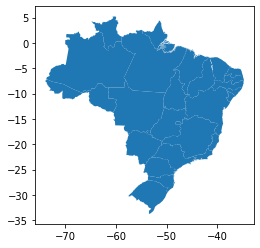

In [0]:
Brasil_Estados.plot()

In [0]:
Crimes_2019 = pd.read_excel ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Crimes_2019.xlsx') 
Crimes_2019.head()

,Estados,Roubos_Veiculos_2019,Homicidios_2019
0,AC,573,144
1,AL,1107,529
2,AP,204,123
3,AM,1055,449
4,BA,5660,2439


In [0]:
# Altera o nome da Coluna Estados para UF
Crimes_2019.rename(columns={'Estados': 'UF'}, inplace=True)
Crimes_2019.head()
                            

,UF,Roubos_Veiculos_2019,Homicidios_2019
0,AC,573,144
1,AL,1107,529
2,AP,204,123
3,AM,1055,449
4,BA,5660,2439


In [0]:
# Executa um Join, incluindo a entre as tabelas a partir da coluna UF
Brasil_Estados = pd.merge(Brasil_Estados, Crimes_2019, on=['UF'], how="outer")
Brasil_Estados.head()

,ESTADOS,REGIAO,COD_UF,UF,geometry,Roubos_Veiculos_2019,Homicidios_2019
0,Acre,Norte,12.0,AC,"POLYGON ((-73.80098 -7.11145, -73.74084 -7.143...",573,144
1,Alagoas,Nordeste,27.0,AL,"MULTIPOLYGON (((-36.39119 -10.50082, -36.39864...",1107,529
2,Amapá,Norte,16.0,AP,"MULTIPOLYGON (((-51.37380 -0.37053, -51.37337 ...",204,123
3,Amazonas,Norte,13.0,AM,"POLYGON ((-73.80098 -7.11145, -73.80106 -7.111...",1055,449
4,Bahia,Nordeste,29.0,BA,"MULTIPOLYGON (((-46.32975 -13.25248, -46.33072...",5660,2439


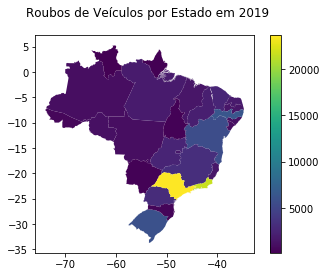

In [0]:
fig, ax = plt.subplots (1,1)
fig.suptitle ('Roubos de Veículos por Estado em 2019')
Brasil_Estados.plot (column = 'Roubos_Veiculos_2019', ax = ax, legend = True)


In [0]:
!pip install mapclassify

  Created wheel for mapclassify: filename=mapclassify-2.1.1-cp36-none-any.whl size=29001 sha256=b3d7959c58ec1e8840580735df84f90f4bf8b3cc44f0d1f01b90f401864125fe
  Stored in directory: /root/.cache/pip/wheels/fc/b8/58/56b650743289cbecb476ef1fc50ab0aeaa0b12e56ad912d624
Successfully built mapclassify


KeyError: ignored

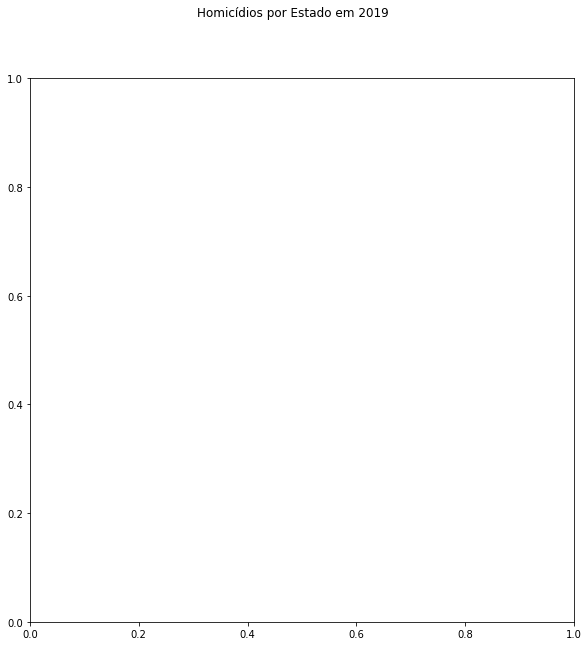

In [0]:
# Apresenta um mapa cloropleto com gradação de cor de laranja para vermelho com classificador do tipo Jenks
fig, ax = plt.subplots (1,figsize = (10,10))
fig.suptitle ('Homicídios por Estado em 2019')
Brasil_Estados.plot (column = 'Homicidios_2019', ax = ax, cmap='OrRd', scheme='fisherjenks', legend = True, edgecolor='black')

In [0]:
Pop = pd.read_excel ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Pop_Estados.xlsx') 
Pop.dtypes

UF                    object
Unidade federativa    object
População              int64
dtype: object

In [0]:
Pop.head()

,UF,Unidade federativa,População
0,AC,Acre,881935
1,AL,Alagoas,3337357
2,AP,Amapá,845731
3,AM,Amazonas,4144597
4,BA,Bahia,14873064


In [0]:
# Calcula a taxa de homicídios por cem mil habitantes e cria uma coluna com essa informação
Crimes_2019 ['Taxa_Hom'] = (Crimes_2019['Homicidios_2019']/Pop['População'])*100000
Crimes_2019.head()

,UF,Roubos_Veiculos_2019,Homicidios_2019,Taxa_Hom
0,AC,573,144,16.327734
1,AL,1107,529,15.850866
2,AP,204,123,14.543631
3,AM,1055,449,10.833381
4,BA,5660,2439,16.398773


In [0]:
Brasil_Estados = pd.merge (Brasil_Estados, Crimes_2019, on=['UF'])
Brasil_Estados.head()

,ESTADOS,REGIAO,COD_UF,UF,geometry,Roubos_Veiculos_2019_x,Homicidios_2019_x,Roubos_Veiculos_2019_y,Homicidios_2019_y,Taxa_Hom
0,Acre,Norte,12.0,AC,"POLYGON ((-73.80098 -7.11145, -73.74084 -7.143...",573,144,573,144,16.327734
1,Alagoas,Nordeste,27.0,AL,"MULTIPOLYGON (((-36.39119 -10.50082, -36.39864...",1107,529,1107,529,15.850866
2,Amapá,Norte,16.0,AP,"MULTIPOLYGON (((-51.37380 -0.37053, -51.37337 ...",204,123,204,123,14.543631
3,Amazonas,Norte,13.0,AM,"POLYGON ((-73.80098 -7.11145, -73.80106 -7.111...",1055,449,1055,449,10.833381
4,Bahia,Nordeste,29.0,BA,"MULTIPOLYGON (((-46.32975 -13.25248, -46.33072...",5660,2439,5660,2439,16.398773


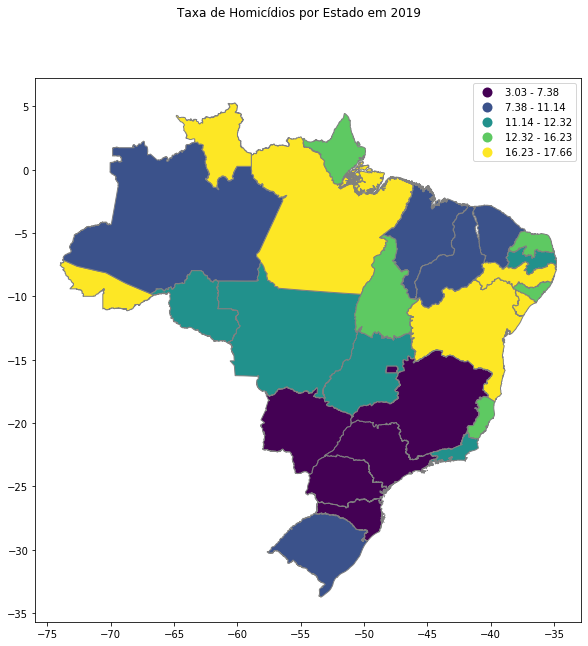

In [0]:
# Cria o Mapa cloropleto das taxas de homicídio do Brasil com classificação do tipo quantiles
fig, ax = plt.subplots (1,figsize = (10,10))
fig.suptitle ('Taxa de Homicídios por Estado em 2019')
Brasil_Estados.plot (column = 'Taxa_Hom', ax = ax, scheme='quantiles', legend = True, edgecolor='gray')
plt.savefig ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Taxa de Homicídios por Estado em 2019.png')

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


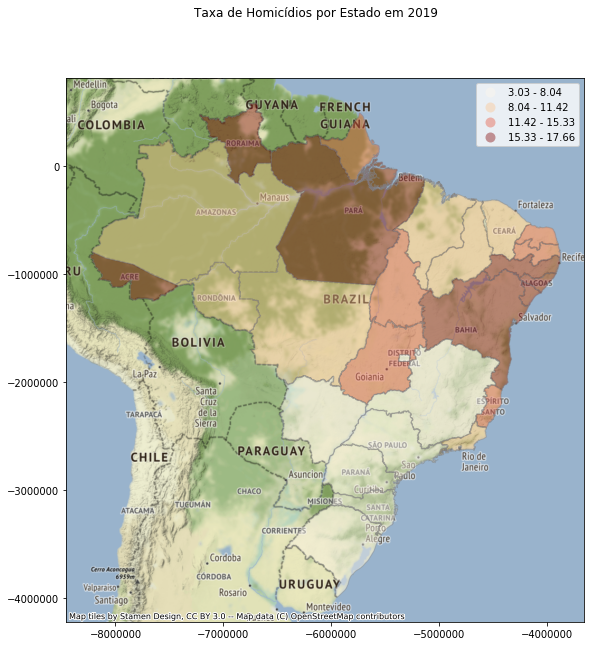

In [0]:
# Cria o Mapa cloropleto das taxas de homicídio do Brasil com classificação do tipo quantiles e com mapa base
Brasil_Estados_WM = Brasil_Estados.to_crs (epsg=3857)
fig, ax = plt.subplots (1,figsize = (10,10))
fig.suptitle ('Taxa de Homicídios por Estado em 2019')
Brasil_Estados_WM.plot (column = 'Taxa_Hom', k=4, alpha = 0.4, ax = ax, scheme='quantiles', cmap='OrRd', legend = True, edgecolor='gray')
ctx.add_basemap (ax)
plt.savefig ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Taxa de Homicídios por Estado em 2019_2.png')

# Construção de um Mapa com Kernel Desity Estimation (KDE), ou mancha de calor com o uso da biblioteca Seaborn 

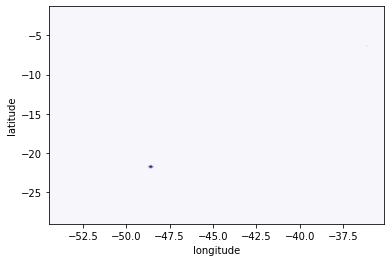

In [0]:
# Construção de um KDE com a biblioteca seaborn

sns.kdeplot(Hom_2019['longitude'], Hom_2019['latitude'], \
            shade=True, cmap='Purples')
          

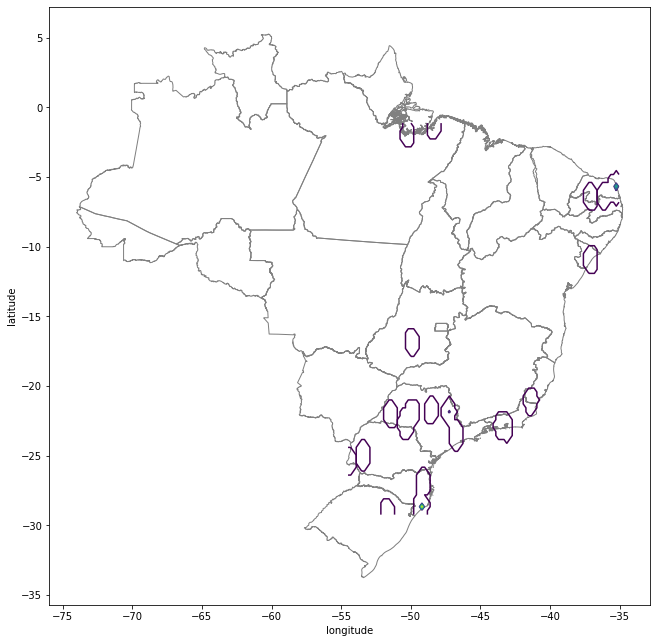

In [0]:
# KDE de Homicídios tendo o parâmetro shade = False
f, ax = plt.subplots(1, figsize=(11, 11))

sns.kdeplot(Hom_2019['longitude'], Hom_2019['latitude'], kernel = 'gau', gridsize= 100, \
            alpha = 1.0, cmap='viridis', cut = 10,\
            ax=ax);
ax = Brasil_Estados.plot(color='none', edgecolor = 'gray', linewidth=1, ax=ax)
plt.show()

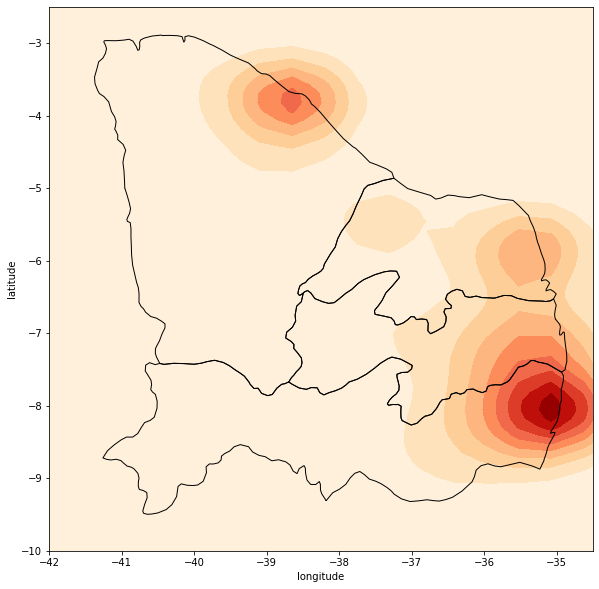

In [0]:
# KDE de Roubos a Banco com parâmetro shade = True

PE_PB_RN_CE= gpd.read_file ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/PE_PB_RN_CE.shp')
Roubo_Bancos = gpd.read_file ('/content/drive/My Drive/Colab Notebooks/Introducao_Analise_Criminal_Espacial_Python/Roubo_Bancos_1024_15_PEPBRNCE.shp')

f, ax = plt.subplots(1, figsize=(10, 10))
sns.kdeplot(Roubo_Bancos['longitude'], Roubo_Bancos['latitude'], \
            shade = True, alpha = 1.0, cmap='OrRd', kernel = 'quad')
ax = PE_PB_RN_CE.plot(color='none', edgecolor = 'black', linewidth=1, ax=ax)

# Corta a figura nas coordenadas desejadas
ax.set_xlim(-42, -34.5)
ax.set_ylim(-10, -2.5)
# Mostra a  
plt.show()